In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
import h5py
filename = 'data/SNOLAB_sims.h5'
#remove vars
f = h5py.File(filename,'r')

path='{}/{}/'.format('SNOLAB','10x')

En = np.asarray(f[path+'En'])
print(np.shape(En))


path='{}/{}/'.format('SNOLAB','1x')

Enlow = np.asarray(f[path+'En'])
print(np.shape(Enlow))

path='{}/{}/'.format('SNOLAB','100x')

Enmax = np.asarray(f[path+'En'])
print(np.shape(Enmax))

path='{}/{}/'.format('SNOLAB','1000x')

Encentury = np.asarray(f[path+'En'])
print(np.shape(Encentury))

path='{}/{}/'.format('SNOLAB','10000x')

En10k = np.asarray(f[path+'En'])
print(np.shape(En10k))

path='{}/{}/'.format('SNOLAB','elastic')

Enel = np.asarray(f[path+'En'])
print(np.shape(Enel))

path='{}/{}/'.format('SNOLAB','elastic1x')

Enel1x = np.asarray(f[path+'En'])
print(np.shape(Enel))

f.close

(9480,)
(948,)
(94800,)
(948000,)
(9480000,)
(1020000,)
(1020000,)


<bound method File.close of <HDF5 file "SNOLAB_sims.h5" (mode r)>>

In [3]:
#make histos (counts per day)


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En+0.764,bins=ebins)

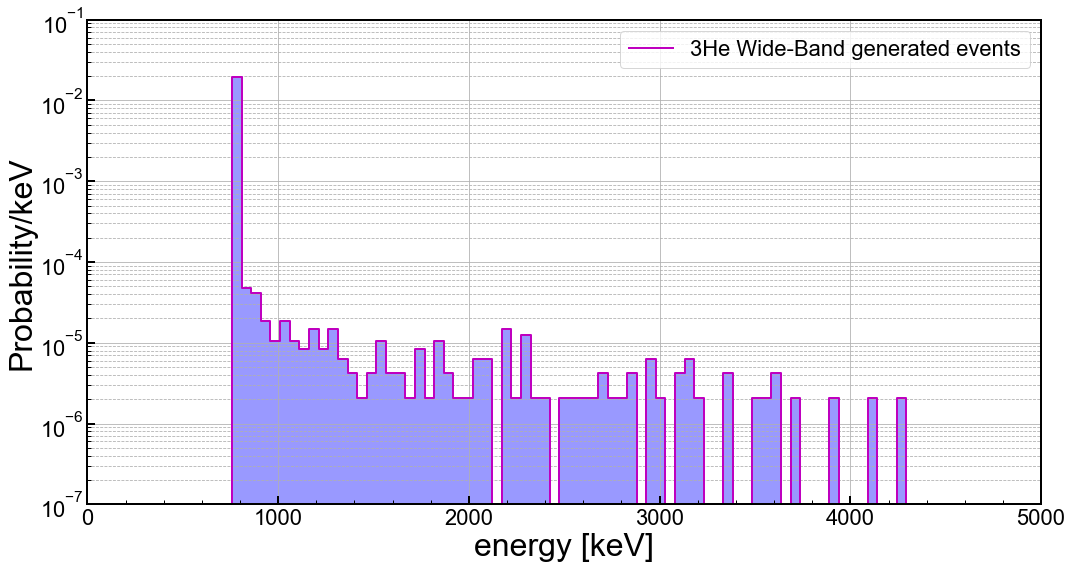

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [5]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(Enlow+0.764,bins=ebins)

nel,nxel = np.histogram(Enel1x,bins=ebins)

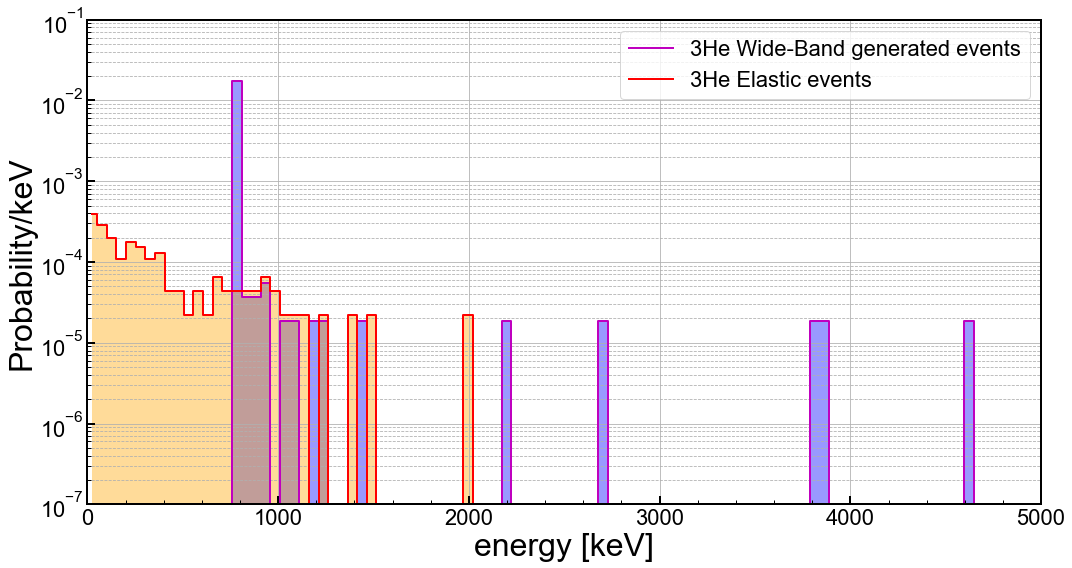

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]*(948/(948+120))
thistel = (nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [7]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(Enmax+0.764,bins=ebins)

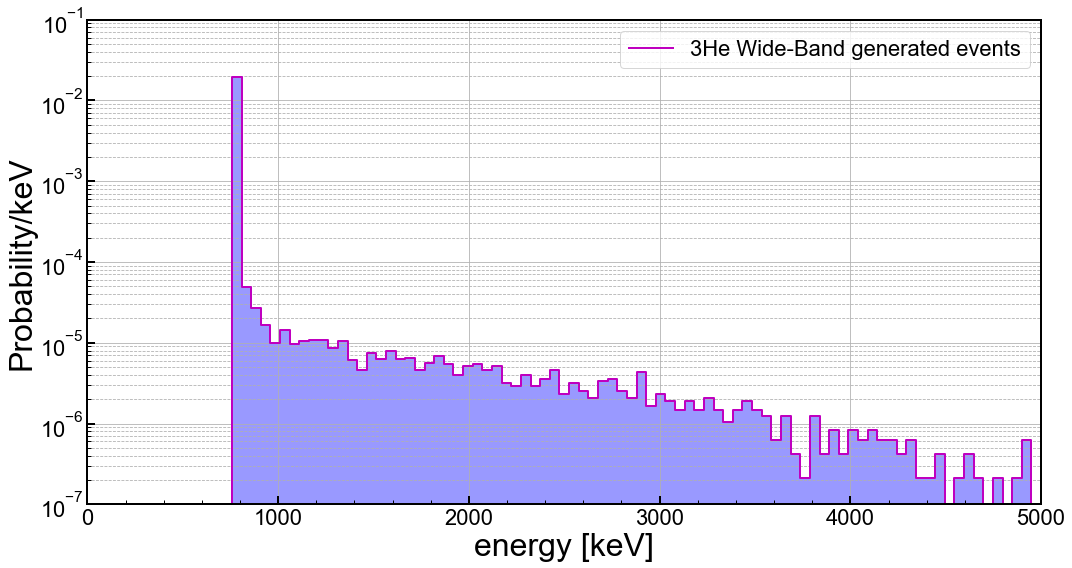

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [9]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(Encentury+0.764,bins=ebins)

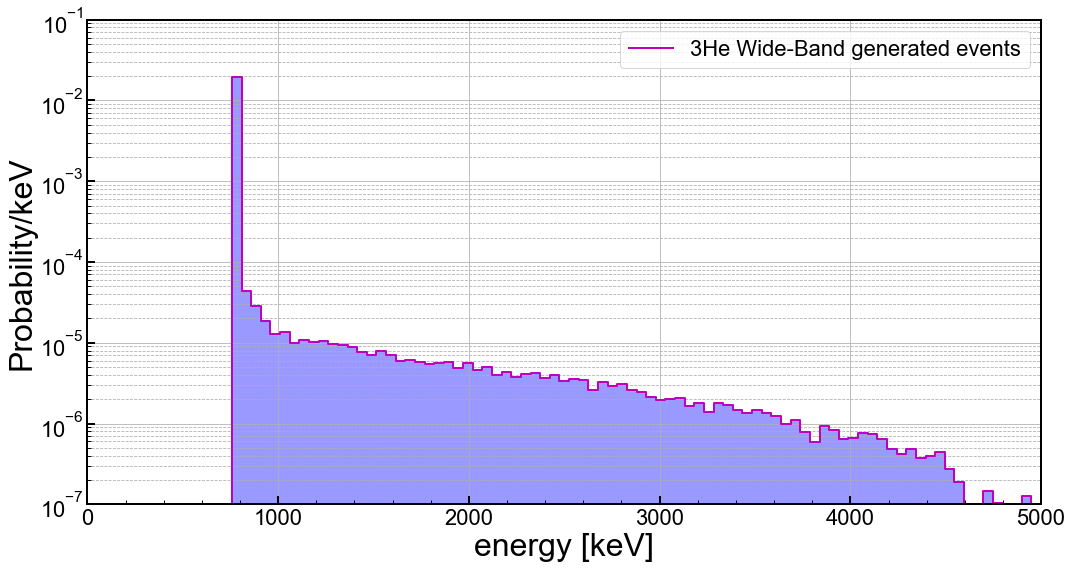

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [11]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En10k+0.764,bins=ebins)


nel,nxel = np.histogram(Enel,bins=ebins)

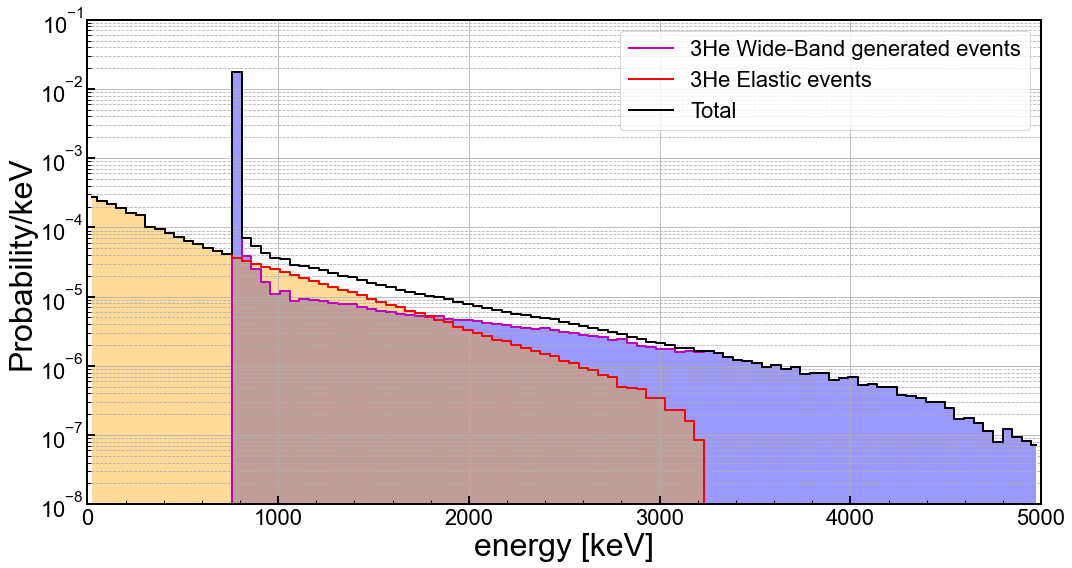

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = (n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)



ymin = 1e-8
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [13]:
f.close()

Add Resolutions and Stuff
-------------------------

In [14]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

In [15]:
#get some cross section data
import ENDF6
f = open('data/jendl5_3He.endf6')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # Elastic
x, y = ENDF6.read_table(sec)

sec_np = ENDF6.find_section(lines, MF=3, MT=103)  # Elastic
xnp, ynp = ENDF6.read_table(sec_np)

In [16]:
#densities to convert to macroscopic xn
rholhe3 = 0.0792 #g/cm^3
masshe3 = 3.016 #molar mass
nhe3 = (rholhe3/masshe3)*co.N_A

In [17]:
ESigElMeV = x/1e6
SigElMeV = y*1e-24*nhe3

ESigMeV = xnp/1e6
SigMeV = ynp*1e-24*nhe3

In [18]:
prange_data = pd.read_csv("data/p-range-helium.txt", skiprows=8, names=['E [MeV]', 'CDSA range [g/cm2]','projected range'], \
                         delim_whitespace=True)
print (prange_data.head(10))

   E [MeV]  CDSA range [g/cm2]  projected range
0   0.0010            0.000005         0.000003
1   0.0015            0.000007         0.000004
2   0.0020            0.000009         0.000006
3   0.0025            0.000010         0.000007
4   0.0030            0.000012         0.000008
5   0.0040            0.000015         0.000011
6   0.0050            0.000017         0.000013
7   0.0060            0.000019         0.000015
8   0.0070            0.000021         0.000017
9   0.0080            0.000023         0.000019


In [19]:
arange_data = pd.read_csv("data/a-range-helium.txt", skiprows=8, names=['E [MeV]', 'CDSA range [g/cm2]','projected range'], \
                         delim_whitespace=True)
print (arange_data.head(10))

   E [MeV]  CDSA range [g/cm2]  projected range
0   0.0010            0.000002         0.000002
1   0.0015            0.000004         0.000003
2   0.0020            0.000005         0.000004
3   0.0025            0.000007         0.000005
4   0.0030            0.000008         0.000006
5   0.0040            0.000011         0.000008
6   0.0050            0.000014         0.000010
7   0.0060            0.000016         0.000013
8   0.0070            0.000019         0.000015
9   0.0080            0.000021         0.000017


In [20]:
T = np.asarray(prange_data['E [MeV]'])
Tcut = (T<0.85)&(T>0.7)
R = np.asarray(prange_data['CDSA range [g/cm2]'])
Rproj = np.asarray(prange_data['projected range'])

In [21]:
Ta = np.asarray(arange_data['E [MeV]'])
Ra = np.asarray(arange_data['CDSA range [g/cm2]'])
Rproja = np.asarray(arange_data['projected range'])

In [22]:
#get functions for the macroscopic (n,p) cross sections and the range as functions of energy. 

import scipy.interpolate as inter

Sigmanp = inter.InterpolatedUnivariateSpline(ESigMeV,SigMeV, k=3)
pRange = inter.InterpolatedUnivariateSpline(T,R/rholhe3, k=3)
aRange = inter.InterpolatedUnivariateSpline(Ta,Ra/rholhe3, k=3)

In [23]:
print(pRange([.01,0.1,1]))

[0.00033889 0.00151136 0.02708333]


In [24]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

Q=0.764
#calculate which events have the penetration range less than the proton range
penRange_np10k = 1/Sigmanp(En10k/1000)
protRange_np10k = pRange((En10k+Q)/1000)
alphaRange_el = aRange(Enel/1000)

In [25]:
print(penRange_np10k[0:10])
print(protRange_np10k[0:10])

[0.02769402 0.00022602 0.00021483 0.00028618 0.00040502 0.00043382
 0.00065951 0.00045195 0.00047498 0.00018775]
[4.86893907e-05 4.86816288e-05 4.86816288e-05 4.86816291e-05
 4.86816300e-05 4.86816302e-05 4.86816327e-05 4.86816304e-05
 4.86816306e-05 4.86816286e-05]


In [26]:
#cEscape_np10k = penRange_np10k < protRange_np10k
cEscape_np10k = En10k<1.0
print(np.shape(En10k[cEscape_np10k]))

(9418471,)


In [27]:
#for all that have penetrated, how much proton path they loose. 
dgen_np10k = np.random.exponential(Sigmanp(En10k))
thetgen_np10k = np.random.uniform(0,np.pi,np.shape(En10k))
print(np.shape(En10k))
print(np.shape(dgen_np10k))
print(np.shape(thetgen_np10k))
print(dgen_np10k[0:10])
print(thetgen_np10k[0:10])

(9480000,)
(9480000,)
(9480000,)
[3.04734423e-01 3.77076002e+01 3.59884786e+02 1.39048062e+02
 5.31836858e+01 2.96509712e+01 8.50922885e+01 1.43748093e+01
 1.21569651e+02 2.68087016e+01]
[1.72433515 0.15051414 0.66333869 1.95916369 2.93442423 2.35335009
 0.23218432 1.23936357 0.29509655 0.33394558]


In [28]:
lw_np10k = dgen_np10k/np.cos(thetgen_np10k)

In [29]:
cNoChange_np10k = (thetgen_np10k>=np.pi/2) | (~cEscape_np10k) | (protRange_np10k<=lw_np10k)
print(np.shape(En10k[cNoChange_np10k]))

(9479843,)


In [30]:
print(np.shape(En10k[cEscape_np10k]))
print(np.shape(En10k))

(9418471,)
(9480000,)


In [31]:
perc_np10k = lw_np10k/protRange_np10k

In [32]:
En_mod_10k = En10k+Q
En_mod_10k[~cNoChange_np10k] = (En_mod_10k[~cNoChange_np10k])*perc_np10k[~cNoChange_np10k]

In [33]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En_mod_10k,bins=ebins)


nel,nxel = np.histogram(Enel,bins=ebins)

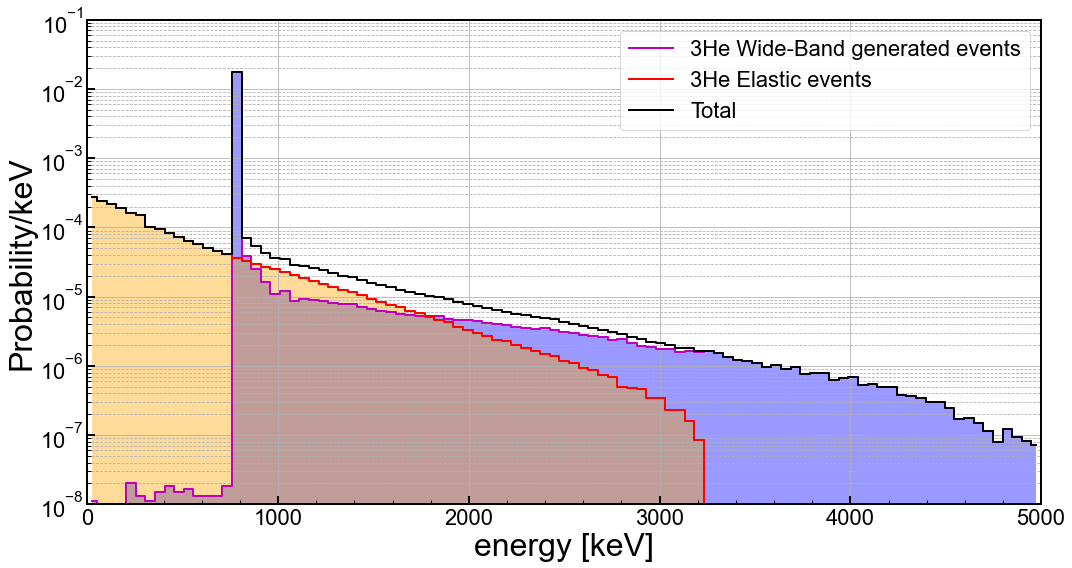

In [34]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = (n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)



ymin = 1e-8
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [35]:
#En_mod_10k[~cNoChange_np10k]/(En10k[~cNoChange_np10k]+Q)

In [36]:
#now, we want to calculate how many we loose just because they happen to be near the edge. 
#calculate this as a probability as a function of deposited energy
Edepalpha = np.linspace(0,5000,100)
Ralpha = aRange(Edepalpha/1000)
Edepp = np.linspace(Q+1,5000,100)
Rp = pRange(Edepp/1000)

In [37]:
#calculate the volume of a shell the size of Ralpha and Rp from the edge
Valpha = 8 - (2-Ralpha)**3
Vp = 8 - (2-Rp)**3
frac_alpha = Valpha/8
frac_p = Vp/8

In [38]:
print(frac_alpha)

[6.36806407e-07 1.65929494e-03 2.52010960e-03 3.16571417e-03
 3.70704029e-03 4.18568690e-03 4.62647505e-03 5.03860196e-03
 5.43019003e-03 5.81055296e-03 6.18120509e-03 6.54467465e-03
 6.90617287e-03 7.26386444e-03 7.62195292e-03 7.98196071e-03
 8.34362826e-03 8.70780212e-03 9.07725643e-03 9.44874437e-03
 9.82627356e-03 1.02089631e-02 1.05969501e-02 1.09906531e-02
 1.13904898e-02 1.17968765e-02 1.22101130e-02 1.26302735e-02
 1.30574061e-02 1.34915588e-02 1.39327796e-02 1.43811339e-02
 1.48367168e-02 1.52996260e-02 1.57699591e-02 1.62478112e-02
 1.67331635e-02 1.72258282e-02 1.77256044e-02 1.82322912e-02
 1.87456949e-02 1.92659032e-02 1.97933689e-02 2.03285679e-02
 2.08719756e-02 2.14240524e-02 2.19848405e-02 2.25539070e-02
 2.31307933e-02 2.37150418e-02 2.43062127e-02 2.49042673e-02
 2.55095674e-02 2.61224915e-02 2.67434172e-02 2.73727055e-02
 2.80104265e-02 2.86563952e-02 2.93104180e-02 2.99723017e-02
 3.06418610e-02 3.13190285e-02 3.20038268e-02 3.26962810e-02
 3.33964157e-02 3.410425

In [39]:
HeFiducial = inter.InterpolatedUnivariateSpline(Edepalpha,frac_alpha, k=3)
pFiducial = inter.InterpolatedUnivariateSpline(Edepp,frac_p, k=3)

In [40]:
cIsEdgeHe = np.random.uniform(0.0,1.0,np.shape(Enel))<HeFiducial(Enel)
cIsEdgenp = np.random.uniform(0.0,1.0,np.shape(En10k))<pFiducial(En10k)

In [41]:
print(np.shape(Enel[cIsEdgeHe]))
print(np.shape(En10k[cIsEdgenp & (En10k>1.0)]))

(20,)
(5,)


In [42]:
#fit parameters for resolution from Luke
#ER:
#Parameter a_2: m = 1.426, b = -38.173
#Parameter a_3: m = 0.183, b = 0.482

#NR: 
#Parameter a_2: m = 0.456, b = 5.372
#Parameter a_3: m = 0.029, b = 11.799

#where a_2 corresponds to signal peak, a_3 corresponds to width.

#er_res = lambda E: (0.183*E+0.482)/(1.426*E-38.173)
#he_res = lambda E: (0.029*E+11.799)/(0.456*E+5.372)

In [43]:
#new fit parameters for ~ sqrt(sig_0 + AE) fit too
#ER:
#a2: m = 1.151, b = 4.763
#a3: a = 1.732E-10, b = 4.762

#NR:
#a2: m = 0.444, b=6.105
#a3: a = 2.424E-15, b = 2.280
er_res = lambda E: np.sqrt(1.732e-10+4.762*E)/(1.15*E+4.763)
he_res = lambda E: np.sqrt(2.424e-15+2.28*E)/(0.444*E+6.105)

In [44]:
print(er_res(764))
print(he_res(1000))

0.06828136117657323
0.10608490362305081


In [45]:
En10k_res = En_mod_10k + np.random.normal(0,En_mod_10k*np.abs(er_res(En_mod_10k*1000)),np.shape(En_mod_10k))
Enel_res = Enel + np.random.normal(0,Enel*(he_res(Enel*1000)),np.shape(Enel))
print(np.max(Enel*he_res(Enel)))
#Enel_res = np.random.normal(Enel,Enel*2)

1.1486011988818634


In [46]:
print(np.shape(En10k_res))
print(np.shape(Enel_res))
test = np.random.normal(0,Enel*(he_res(Enel*1000)),np.shape(Enel))
print(np.max(test))

(9480000,)
(1020000,)
0.6284649896698328


In [47]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En10k_res,bins=ebins)


nel,nxel = np.histogram(Enel_res,bins=ebins)

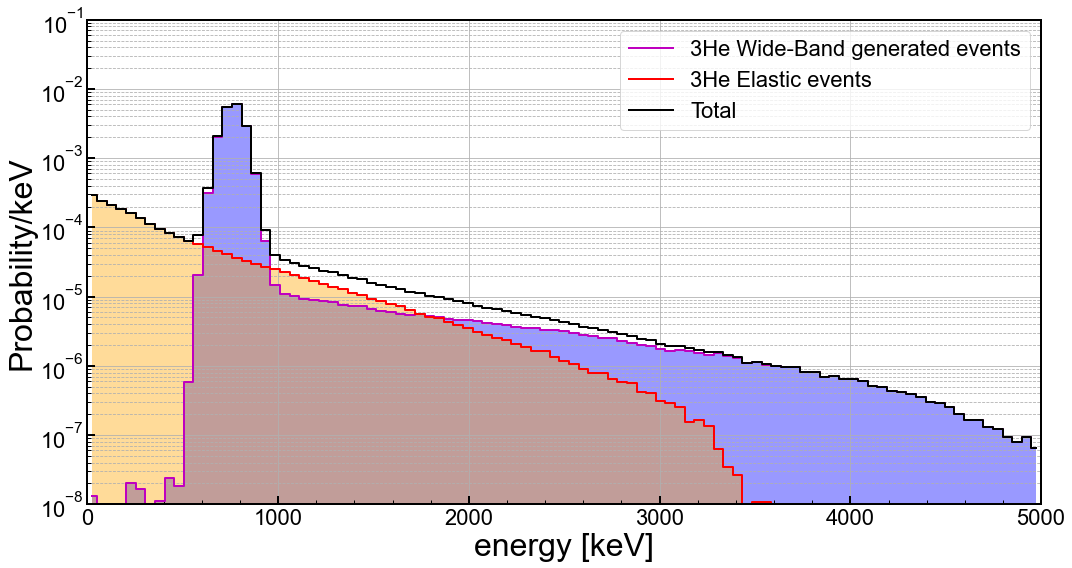

In [48]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = (n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)



ymin = 1e-8
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

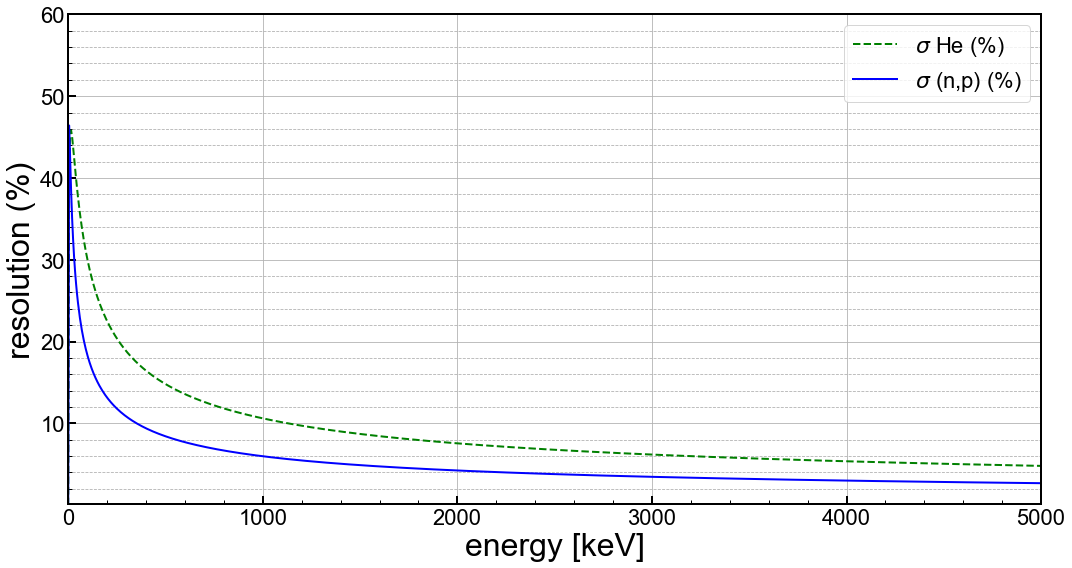

In [49]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

Eplot=np.linspace(0,5000,1000)

ax1.plot(Eplot, 100*he_res(Eplot),color='g',linestyle='--',label="$\sigma$ He (%)")
ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-1
ymax = 60


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('resolution (%)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

Proton Escape for Data
----------------------

In [50]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

#calculate which events have the penetration range less than the proton range
penRange_nplow = 1/Sigmanp(Enlow/1000)
protRange_nplow = pRange((Enlow+Q)/1000)
alphaRange_el1x = aRange(Enel1x/1000)

In [51]:
#cEscape_np10k = penRange_np10k < protRange_np10k
cEscape_nplow = Enlow<1.0
print(np.shape(Enlow[cEscape_nplow]))

(943,)


In [52]:
#for all that have penetrated, how much proton path they loose. 
dgen_nplow = np.random.exponential(Sigmanp(Enlow))
thetgen_nplow = np.random.uniform(0,np.pi,np.shape(Enlow))
print(np.shape(Enlow))
print(np.shape(dgen_nplow))
print(np.shape(thetgen_nplow))
print(dgen_nplow[0:10])
print(thetgen_nplow[0:10])

(948,)
(948,)
(948,)
[8.93825962e-03 1.16574671e+02 9.75462910e+01 1.91120144e+01
 5.49009402e+01 2.12620226e+02 2.16965877e+01 6.55501865e+00
 1.65025644e+01 2.04113407e+02]
[3.11674902 2.46232126 1.89204794 0.41361801 2.03915522 2.42247341
 0.24549073 0.79419723 0.92034114 3.00037137]


In [53]:
lw_nplow = dgen_nplow/np.cos(thetgen_nplow)

In [54]:
cNoChange_nplow = (thetgen_nplow>=np.pi/2) | (~cEscape_nplow) | (protRange_nplow<=lw_nplow)
print(np.shape(Enlow[cNoChange_nplow]))

(948,)


In [55]:
print(np.shape(Enlow[cEscape_nplow]))
print(np.shape(Enlow))

(943,)
(948,)


In [56]:
perc_nplow = lw_nplow/protRange_nplow

In [57]:
En_mod_low = Enlow+Q
En_mod_low[~cNoChange_nplow] = (En_mod_low[~cNoChange_nplow])*perc_nplow[~cNoChange_nplow]

In [58]:
Enlow_res = (En_mod_low) + np.random.normal(0,(En_mod_low)*np.abs(er_res((En_mod_low)*1000)),np.shape(En_mod_low))
Enel1x_res = Enel1x + np.random.normal(0,Enel1x*(he_res(Enel1x*1000)),np.shape(Enel1x))


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
ndata,nxdata = np.histogram(Enlow_res,bins=ebins)

neldata,nxeldata = np.histogram(Enel1x_res,bins=ebins)

sigdata = np.sqrt(ndata+neldata)
sigeldata = np.sqrt(neldata)

In [59]:
#apply FC error bars
fcup = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30,18.32,19.32,20.80,21.81,22.82,23.82,25.30]
fcdn = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28,10.30,11.32,12.33,12.79,13.81,14.82,15.83]

print(np.shape(fcup))
print(np.shape(fcdn))

(21,)
(21,)


In [60]:
ntot = ndata+neldata
ntot_plus = np.zeros(np.shape(ntot))
ntot_minus = np.zeros(np.shape(ntot))
for i,ncount in enumerate(ntot):
    if ncount<=20:
        ntot_plus[i] = fcup[ncount]-ncount
        ntot_minus[i] = ncount-fcdn[ncount]
    else:
        ntot_plus[i] = np.sqrt(ncount)
        ntot_minus[i] = np.sqrt(ncount)
        

In [61]:
def edep2en(x):
    return x-1000*Q


def en2edep(x):
    return x+1000*Q

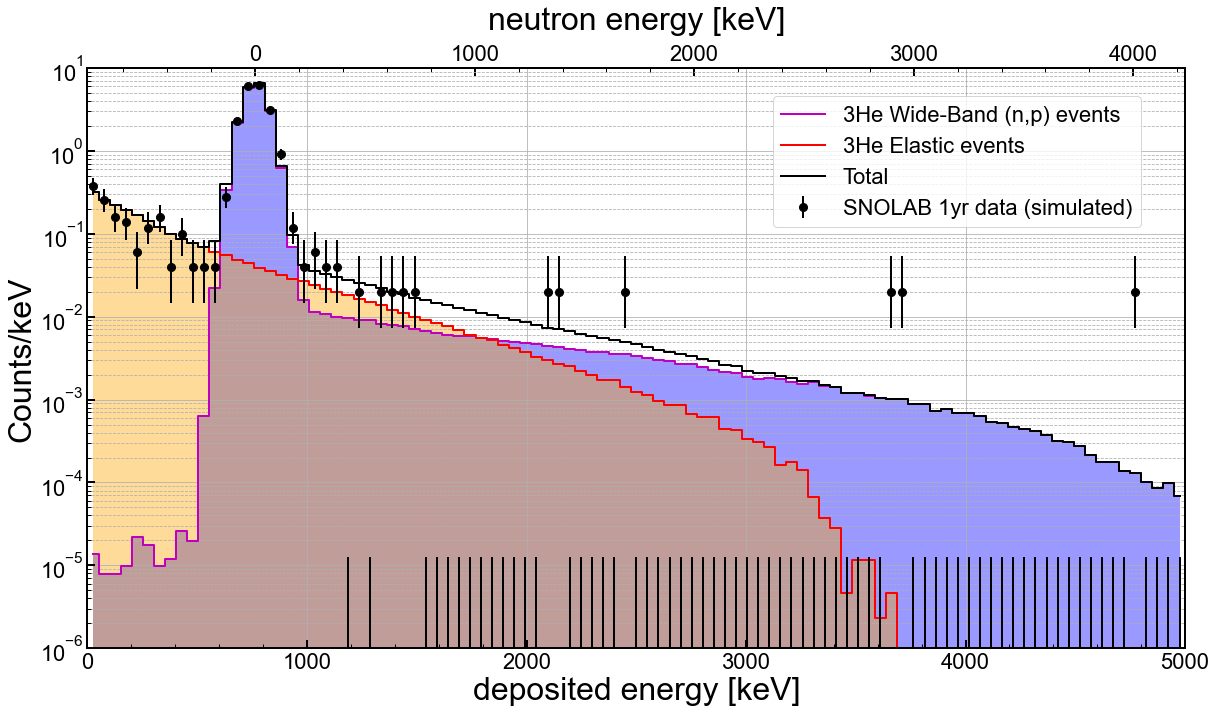

In [62]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(17.0,10.0),sharex=True)
ax1 = axes

tdata = ntot/np.diff(xcq*1000)[0]
ct0 = tdata==0
tup = ntot_plus/np.diff(xcq*1000)[0]
tup[ct0] = 0.0005*tup[ct0]
tdn = ntot_minus/np.diff(xcq*1000)[0]
thist = (948+120)*(n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (948+120)*(nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band (n,p) events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)

ax1.errorbar(xcq*1000,tdata,yerr=[tdn,tup], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='SNOLAB 1yr data (simulated)', linewidth=2)



ymin = 1e-6
ymax = 1e1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'deposited energy [keV]')
ax1.set_ylabel('Counts/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc='upper right', bbox_to_anchor=(0.97, 0.97),prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

secax = ax1.secondary_xaxis('top', functions=(edep2en, en2edep))
secax.set_xlabel('neutron energy [keV]',labelpad=15)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
plt.savefig('figures/SNOLAB_expected_spectrum.pdf')
plt.show()

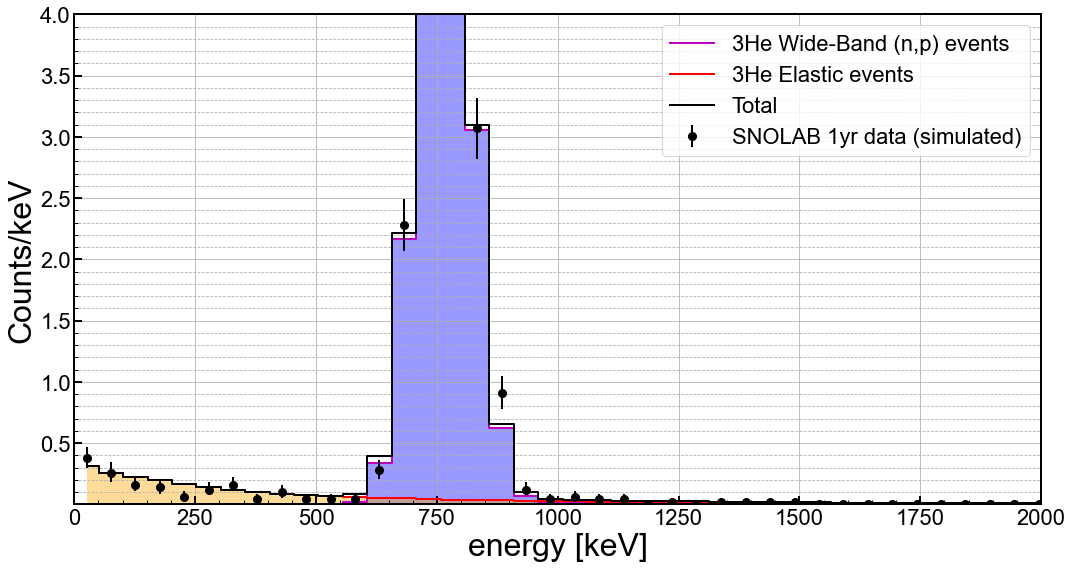

In [63]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

tdata = ntot/np.diff(xcq*1000)[0]
ct0 = tdata==0
tup = ntot_plus/np.diff(xcq*1000)[0]
#tup[ct0] = 0.0005*tup[ct0]
tdn = ntot_minus/np.diff(xcq*1000)[0]
thist = (948+120)*(n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (948+120)*(nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band (n,p) events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)

ax1.errorbar(xcq*1000,tdata,yerr=[tdn,tup], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='SNOLAB 1yr data (simulated)', linewidth=2)



ymin = 1e-6
ymax = 4

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 2*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Counts/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

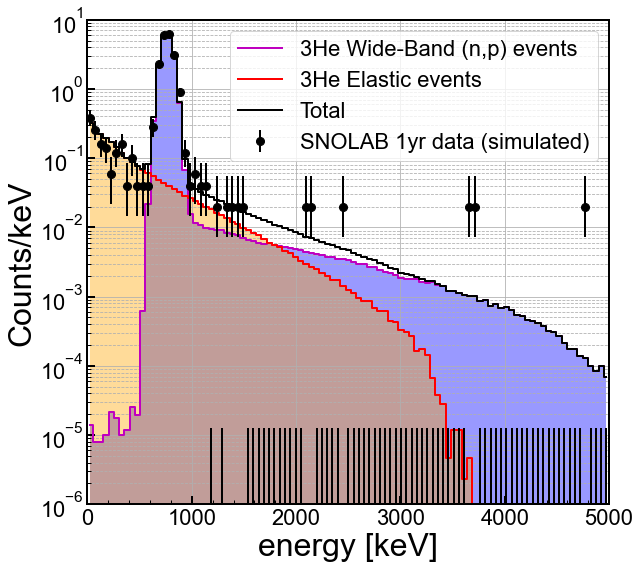

In [64]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

tdata = ntot/np.diff(xcq*1000)[0]
ct0 = tdata==0
tup = ntot_plus/np.diff(xcq*1000)[0]
tup[ct0] = 0.0005*tup[ct0]
tdn = ntot_minus/np.diff(xcq*1000)[0]
thist = (948+120)*(n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (948+120)*(nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band (n,p) events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)

ax1.errorbar(xcq*1000,tdata,yerr=[tdn,tup], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='SNOLAB 1yr data (simulated)', linewidth=2)



ymin = 1e-6
ymax = 1e1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Counts/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()